### Применение решающего дерева
20% баллов за задание, оценочное время выполнения 30 минут + установка GraphViz
Постройте решающее дерево из sklearn на датасете german credit data из UCI репозитория
и визуализируйте его. Попробуйте проинтерпретировать первые несколько разбиений, изу-
чив описание признаков. Постройте графики зависимости качества на кросс-валидации и на
обучающей выборке от глубины дерева

In [1]:
#Importing necessary packages in Python 
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import pydotplus 
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

import seaborn 
import urllib 

seaborn.set_context('notebook') 
seaborn.set_style(style='darkgrid') 

/home/anatoly/anaconda3/envs/mipt-trends2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# OK let's get started. We'll download the data from the UCI website. 
# Last column is the labels y 

url="http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data" 
raw_data = urllib.urlopen(url)

credit = pd.read_csv(raw_data, sep=' ')

feature_names = [
    "A1 chkngAcctStatus", "A2 durationMonths", "A3 creditHistory",
    "A4 loanPurpose", "A5 creditAmount", "A6 savingsTotal",
    "A7 crrntEmplmtSince", "A8 instllmtPct", "A9 persnlStatus",
    "A10 othrDebtorGuaranters", "A11 crrntResidenceSince", "A12 propertyType",
    "A13 age", "A14 otherInstllmtType", "A15 housingType",
    "A16 existingCredits","A17 jobStatus", "A18 numDependents",
    "A19 registeredPhone", "A20 foriegnWorker", "goodBad"
]
target_names = ["Good credit", "Bad credit"]

credit.columns = feature_names

import re
for i in range(len(credit.columns)):
    if credit.iloc[:, i].dtype == object:
        credit.iloc[:, i] = [(lambda x,i: re.sub('A{0}'.format(i+1), '', x))(x,i) for x in credit.iloc[:, i]]
       
X,y = credit.iloc[:, :-1], credit.goodBad

#Great, before we do anything else, let's split the data into train/test. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

credit.head()

(799, 20) (200, 20) (799,) (200,)


,A1 chkngAcctStatus,A2 durationMonths,A3 creditHistory,A4 loanPurpose,A5 creditAmount,A6 savingsTotal,A7 crrntEmplmtSince,A8 instllmtPct,A9 persnlStatus,A10 othrDebtorGuaranters,...,A12 propertyType,A13 age,A14 otherInstllmtType,A15 housingType,A16 existingCredits,A17 jobStatus,A18 numDependents,A19 registeredPhone,A20 foriegnWorker,goodBad
0,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,2
1,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
2,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
3,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,2
4,4,36,2,6,9055,5,3,2,3,1,...,4,35,3,3,1,2,2,2,1,1


### Постройте решающее дерево из sklearn на датасете german credit data из UCI репозитория и визуализируйте его.

In [6]:
def plot_tree(depth):
    """ Plot decision tree with given depth """
    model = tree.DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
    return Image(graph.create_png())  

### Попробуйте проинтерпретировать первые несколько разбиений, изу- чив описание признаков. 

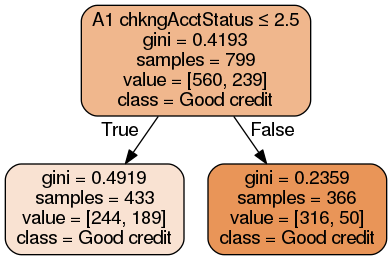

In [7]:
plot_tree(1)

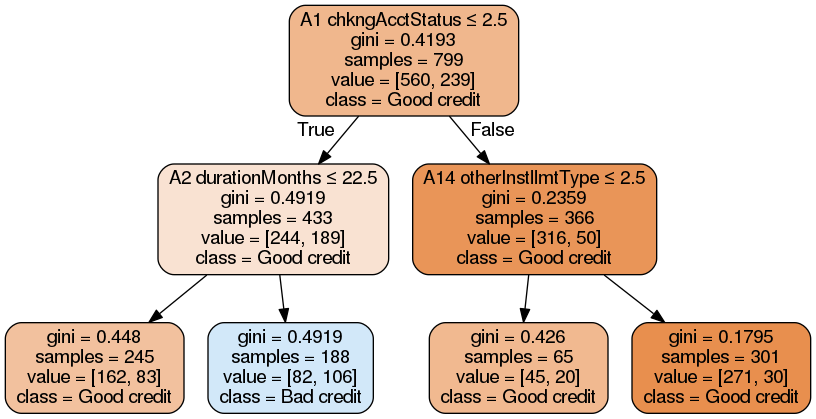

In [8]:
plot_tree(2)

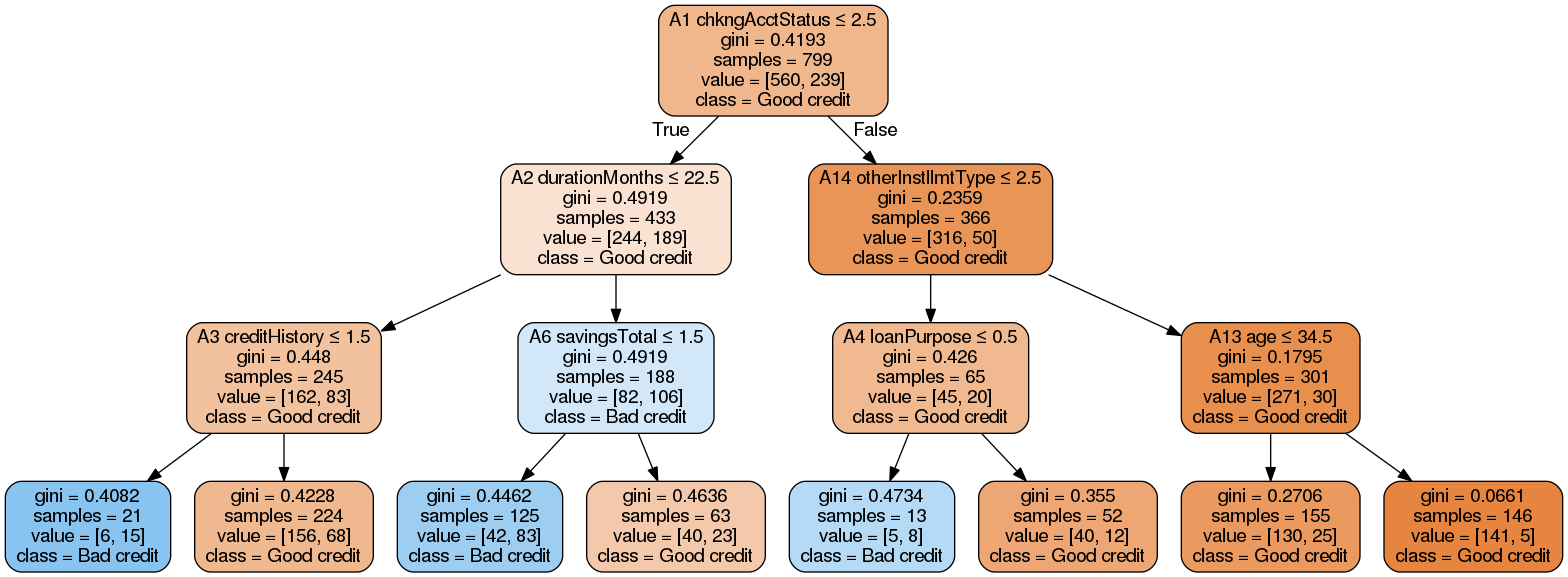

In [9]:
plot_tree(3)

###  Attribute descriptions

Attribute 1:  (qualitative)
 	       Status of existing checking account
           A11 :      ... <    0 DM
 	       A12 : 0 <= ... <  200 DM
 	       A13 :      ... >= 200 DM /
 		     salary assignments for at least 1 year
                A14 : no checking account
 
 Attribute 2:  (numerical)
 	    Duration in month
 
 Attribute 3:  (qualitative)
 	      Credit history
 	      A30 : no credits taken/
 		    all credits paid back duly
               A31 : all credits at this bank paid back duly
 	      A32 : existing credits paid back duly till now
               A33 : delay in paying off in the past
 	      A34 : critical account/
 		    other credits existing (not at this bank)
 
 Attribute 4:  (qualitative)
 	      Purpose
 	      A40 : car (new)
 	      A41 : car (used)
 	      A42 : furniture/equipment
 	      A43 : radio/television
 	      A44 : domestic appliances
 	      A45 : repairs
 	      A46 : education
 	      A47 : (vacation - does not exist?)
 	      A48 : retraining
 	      A49 : business
 	      A410 : others
 
 Attribute 5:  (numerical)
 	      Credit amount
 
 Attibute 6:  (qualitative)
 	      Savings account/bonds
 	      A61 :          ... <  100 DM
 	      A62 :   100 <= ... <  500 DM
 	      A63 :   500 <= ... < 1000 DM
 	      A64 :          .. >= 1000 DM
               A65 :   unknown/ no savings account
 
 Attribute 7:  (qualitative)
 	      Present employment since
 	      A71 : unemployed
 	      A72 :       ... < 1 year
 	      A73 : 1  <= ... < 4 years  
 	      A74 : 4  <= ... < 7 years
 	      A75 :       .. >= 7 years
 
 Attribute 8:  (numerical)
 	      Installment rate in percentage of disposable income
 
 Attribute 9:  (qualitative)
 	      Personal status and sex
 	      A91 : male   : divorced/separated
 	      A92 : female : divorced/separated/married
               A93 : male   : single
 	      A94 : male   : married/widowed
 	      A95 : female : single
 
 Attribute 10: (qualitative)
 	      Other debtors / guarantors
 	      A101 : none
 	      A102 : co-applicant
 	      A103 : guarantor
 
 Attribute 11: (numerical)
 	      Present residence since
 
 Attribute 12: (qualitative)
 	      Property
 	      A121 : real estate
 	      A122 : if not A121 : building society savings agreement/
 				   life insurance
               A123 : if not A121/A122 : car or other, not in attribute 6
 	      A124 : unknown / no property
 
 Attribute 13: (numerical)
 	      Age in years
 
 Attribute 14: (qualitative)
 	      Other installment plans 
 	      A141 : bank
 	      A142 : stores
 	      A143 : none
 
 Attribute 15: (qualitative)
 	      Housing
 	      A151 : rent
 	      A152 : own
 	      A153 : for free
 
 Attribute 16: (numerical)
               Number of existing credits at this bank
 
 Attribute 17: (qualitative)
 	      Job
 	      A171 : unemployed/ unskilled  - non-resident
 	      A172 : unskilled - resident
 	      A173 : skilled employee / official
 	      A174 : management/ self-employed/
 		     highly qualified employee/ officer
 
 Attribute 18: (numerical)
 	      Number of people being liable to provide maintenance for
 
 Attribute 19: (qualitative)
 	      Telephone
 	      A191 : none
 	      A192 : yes, registered under the customers name
 
 Attribute 20: (qualitative)
 	      foreign worker
 	      A201 : yes
 	      A202 : no
 

### Постройте графики зависимости качества на кросс-валидации и на обучающей выборке от глубины дерева.

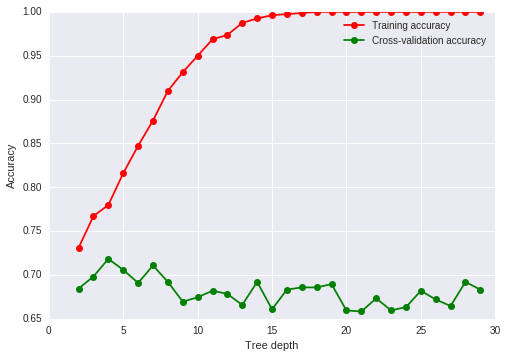

In [10]:
cross_val_acc = []
train_acc = []

max_depth = range(2,30)
for depth in max_depth:
    model = tree.DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    cross_val_acc.append(np.mean(cross_val_score(model, X_train, y_train)))

plt.figure()
plt.xlabel("Tree depth") 
plt.ylabel("Accuracy")
plt.plot(max_depth, train_acc, 'o-', color="r", label="Training accuracy") 
plt.plot(max_depth, cross_val_acc, 'o-', color="g", label="Cross-validation accuracy")
plt.legend(loc="best")

## BCЕ:)

### Реализация решающего дерева (опциональная часть)
В этом задании предлагается использовать датасет boston из sklearn.datasets. Оставьте
последние 25% объектов для контроля качества, разделив X и y на X_train, y_train и X_test,
y_test.
1Реализуйте свой класс DecisionTree, имеющий методы fit и predict, позволяющие соответ-
ственно обучить решающее дерево по матрице признаков X_train и ответам y_train, а затем
спрогнозировать ответы на тестовой выборке X_test. Оцените качество работы вашего дерева
на тестовой выборке.
Рекомендации по реализации дерева:
1. Обучение дерева можно реализовать простым жадным рекурсивным алгоритмом -
каждый раз выбирайте наилучшее разбиение (номер признака и порог по нему) по
уместному на ваш взгляд критерию из рассмотренных на первой лекции о решающих
деревьях (MSE, gini, энтропийный критерий, ошибка классификации)
2. Выбор наилучшего разбиения можно сделать простым перебором по признакам и поро-
гам.
3. Пороги можно перебирать из заранее заданного множества порогов на обучающей вы-
борке - например, взяв все пороги между принимаемыми значениями координат, либо
взяв случайный набор порогов, либо взяв пороги по квантилям значений каждого при-
знака (посчитать квантили будет несложно с помощью scipy). Если возможных порогов
будет слишком много, выбор наилучшего разбиения может оказаться слишком долгой
операцией.
4. Сделайте возможным передавать в конструктор класса ограничение по глубине дерева
и заканчивайте построение дерева при достижении этого ограничения.
5. Можно реализовать отдельный класс для решающего правила вида (k-ый признак мень-
ше порога) и отдельный класс для дерева. Также вам предстоит подумать, как хранить
разбиения внутри дерева, чтобы их было удобно использовать.
6. Какие-то из решений вы можете подсмотреть в чужих реализациях дерева, но от вас не
требуется написать применимую на практике библиотеку - только максимально простую
демонстрацию того, как строится и применяется решающее дерево.

### Decision tree class

In [11]:
class DecisionTree(object):
    ''' Basic realization of binary decision tree for classification and regression.'''
    
    def __init__(self, max_depth, min_size, purp = 'classification'):
        self.max_depth = max_depth
        self.min_size = min_size
        if purp == 'classification':
            self._criterion = self._gini_index
            self._to_terminal = self._to_terminal_classification
        if purp == 'regression':
            self._criterion = self._mse
            self._to_terminal = self._to_terminal_regression
            
    # Calculate the Gini index for a split dataset
    def _gini_index(self, groups, class_values):
        gini = 0.0
        for class_value in class_values:
            for group in groups:
                size = len(group)
                if size == 0:
                    continue
                proportion = [row[-1] for row in group].count(class_value) / float(size)
                gini += (proportion * (1.0 - proportion))
        return gini
    
    # Calsulate MSE for split dataset
    def _mse(self, groups, values):
        mse = 0.0
        for group in groups:
            n = len(group)
            targets = np.array([row[-1] for row in group])
            mean = np.mean(targets)
            mse += np.sum(np.square(targets-mean))
        return mse / n
    
    # Split a dataset based on an attribute and an attribute value
    def _test_split(self, index, value, dataset):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right

    
    # Select the best split point for a dataset
    def _get_split(self, dataset):
        class_values = list(set(row[-1] for row in dataset))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(dataset[0])-1):
            for row in dataset:
                groups = self._test_split(index, row[index], dataset)
                criterion = self._criterion(groups, class_values)
                if criterion < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], criterion, groups
        return {'index':b_index, 'value':b_value, 'groups':b_groups}
    
    # Create a terminal node value (default)
    def _to_terminal(self, group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)
    
    # Create a terminal node value (for classification)
    def _to_terminal_classification(self, group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)
    
    # Create a terminal node value (for regression)
    def _to_terminal_regression(self, group):
        outcomes = np.array([row[-1] for row in group])
        return np.mean(outcomes)
      
    # Create child splits for a node or make terminal
    def _split(self, node, max_depth, min_size, depth):
        left, right = node['groups']
        del(node['groups'])
        # check for a no split
        if not left or not right:
            node['left'] = node['right'] = self._to_terminal(left + right)
            return
        # check for max depth
        if depth >= max_depth:
            node['left'], node['right'] = self._to_terminal(left), self._to_terminal(right)
            return
        # process left child
        if len(left) <= min_size:
            node['left'] = self._to_terminal(left)
        else:
            node['left'] = self._get_split(left)
            self._split(node['left'], max_depth, min_size, depth+1)
        # process right child
        if len(right) <= min_size:
            node['right'] = self._to_terminal(right)
        else:
            node['right'] = self._get_split(right)
            self._split(node['right'], max_depth, min_size, depth+1)

    # Build a decision tree
    def _build_tree(self, train, max_depth, min_size):
        root = self._get_split(train)
        self._split(root, max_depth, min_size, 1)
        return root

    # Make a prediction with a decision tree
    def _predict(self, node, row):
        if row[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self._predict(node['left'], row)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self._predict(node['right'], row)
            else:
                return node['right']
   
    # Print a decision tree
    def _print_tree(self, node, depth=0, labels=''):
        if isinstance(node, dict):
            if labels == '':
                print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
            if labels != '':
                print('%s[%s < %.3f]' % ((depth*' ', (labels[node['index']+1]), node['value'])))
            self._print_tree(node['left'], depth = depth+1, labels = labels)
            self._print_tree(node['right'], depth = depth+1, labels = labels)
        else:
            print('%s[%s]' % ((depth*' ', node)))
    
    def print_tree(self, labels=''):
        self._print_tree(self.tree, labels=labels)
        
    def fit(self, X, y):
        # Make one array
        y.shape = (len(y),1) 
        train = np.append(X, y, axis=1)
        self.tree = self._build_tree(train, self.max_depth, self.min_size)
    
    def predict(self, X):
        predictions = list()
        for row in X:
            prediction = self._predict(self.tree, row)
            predictions.append(prediction)
        return(predictions)
    


In [12]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

### Тестируем классификацию на примере iris dataset

In [13]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

In [14]:
#Great, before we do anything else, let's split the data into train/test. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(120, 4) (30, 4) (120,) (30,)


In [15]:
tree = DecisionTree(max_depth = 2, min_size = 5, purp = 'classification')
tree.fit(X_train, y_train)

#### Визуализируем дерево.

In [16]:
labels = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [17]:
tree.print_tree(labels)

[petal width < 3.000]
 [sepal width < 5.100]
  [0.0]
  [0.0]
 [petal width < 4.800]
  [1.0]
  [2.0]


#### Точность на обучающей выборке и на тесте.

In [18]:
print "Accuracy on training data: {0}".format(accuracy_score(y_train, tree.predict(X_train)))
print "Accuracy on test data: {0}".format(accuracy_score(y_test, tree.predict(X_test)))

Accuracy on training data: 0.95
Accuracy on test data: 0.966666666667


### Тестируем регрессию на примере boston dataset

In [19]:
# Load data
boston = load_boston()
X = boston.data
y = boston.target
print X.shape, y.shape

(506, 13) (506,)


In [20]:
#Great, before we do anything else, let's split the data into train/test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(404, 13) (102, 13) (404,) (102,)


In [21]:
tree = DecisionTree(max_depth = 30, min_size = 1, purp = 'regression')
tree.fit(X_train, y_train)

/home/anatoly/anaconda3/envs/mipt-trends2.7/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/anatoly/anaconda3/envs/mipt-trends2.7/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### Визуализируем дерево.

In [22]:
labels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $$10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [23]:
tree.print_tree(labels)

[MEDV < 4.970]
 [B < 14.800]
  [AGE < 7.489]
   [ZN < 1.224]
    [43.5]
    [41.3]
   [MEDV < 3.810]
    [ZN < 0.014]
     [50.0]
     [50.0]
    [48.5]
  [RAD < 3.317]
   [ZN < 0.056]
    [47.1166666667]
    [47.1166666667]
   [AGE < 6.728]
    [B < 16.100]
     [ZN < 0.126]
      [29.1]
      [29.8]
     [ZN < 0.493]
      [23.5]
      [22.8]
    [AGE < 7.454]
     [DIS < 13.900]
      [ZN < 0.082]
       [29.0]
       [29.6]
      [AGE < 6.758]
       [ZN < 0.069]
        [30.1]
        [30.5]
       [MEDV < 2.940]
        [ZN < 0.087]
         [34.9]
         [36.4]
        [PTRATIO < 245.000]
         [MEDV < 4.030]
          [33.4]
          [INDUS < 20.000]
           [34.7]
           [ZN < 0.210]
            [ZN < 0.037]
             [35.4]
             [35.4]
            [35.1]
         [PTRATIO < 254.000]
          [28.5]
          [DIS < 28.100]
           [LSTAT < 396.900]
            [ZN < 0.061]
             [32.9]
             [ZN < 0.100]
              [33.1]
         

#### Точность на обучающей выборке и на тесте.

In [24]:
print "Mean squared error on train data: {0}".format(mean_squared_error(y_train, tree.predict(X_train)))
print "Mean squared error on test data {0}".format(mean_squared_error(y_test, tree.predict(X_test)))

Mean squared error on train data: 6.00958632097
Mean squared error on test data 24.3832580683


#### Давайте сравним с результатом для линейной регрессии (чтобы понимать, насколько вообще наше дерево адекватно).

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print "Mean squared error on train data: {0}".format(mean_squared_error(y_train, lr.predict(X_train)))
print "Mean squared error on test data {0}".format(mean_squared_error(y_test, lr.predict(X_test)))

Mean squared error on train data: 22.4123381214
Mean squared error on test data 20.3702235631


### Т.е. наше дерево показывает себя сравнимо.

## ВСЕ:)